# 2.4.3 Regresión logística binaria

**Regresión logística binaria:** $\;$ Bernoulli condicional de log-posibilidad lineal con la entrada
$$\begin{align*}
p(y\mid\boldsymbol{x}, \boldsymbol{\theta})&=\operatorname{Ber}(y\mid\sigma(a))%
\quad\text{con}\quad%
a=f(\boldsymbol{x};\boldsymbol{\theta})=\boldsymbol{w}^t\boldsymbol{x}+b\\
p(y=1\mid\boldsymbol{x};\boldsymbol{\theta})&=\sigma(a)%
=\frac{1}{1+\exp(-(\boldsymbol{w}^t\boldsymbol{x}+b))}\\
p(y=0\mid\boldsymbol{x};\boldsymbol{\theta})&=\sigma(-a)%
=\frac{1}{1+\exp(\boldsymbol{w}^t\boldsymbol{x}+b)}
\end{align*}$$

**Frontera:** $\;\sigma(a)=\sigma(-a)\;\Rightarrow\;a=\boldsymbol{w}^t\boldsymbol{x}+b=0$

**Ejemplo:** $\;\boldsymbol{w}^t=(-1, 1),\,b=0\;\Rightarrow\;-x_1+x_2=0\;\Rightarrow\;x_2=x_1$

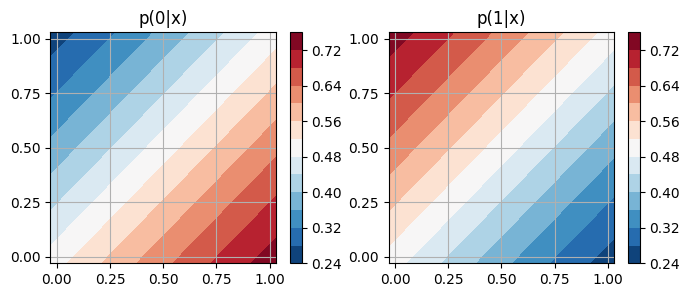

In [1]:
import numpy as np; import matplotlib.pyplot as plt
def sigmoid(a):
	return 1 / (1 + np.exp(-a))
x1, x2 = np.meshgrid(np.linspace(-.03, 1.03, 50), np.linspace(-.03, 1.03, 50))
XX = np.c_[np.ravel(x1), np.ravel(x2)]
Wt = np.array([0, -1, 1]).astype(float) # w^t = (b, w_1, w_2)
P = lambda x: (sigmoid(-(Wt[0] + Wt[1:] @ x)), sigmoid(Wt[0] + Wt[1:] @ x))
PP = np.apply_along_axis(P, 1, XX); _, axs = plt.subplots(1, 2, figsize=(8, 3))
for i, ax in enumerate(axs.flat):
    ax.set_xticks(np.linspace(0., 1, 5)); ax.set_yticks(np.linspace(0., 1, 5))
    ax.grid(); ax.set_title(f'p({i}|x)')
    cp = ax.contourf(x1, x2, PP[:, i].reshape(x1.shape), 15, cmap='RdBu_r')
    plt.colorbar(cp, ax=ax);